# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [4]:
# Initial imports
import os
import pandas as pd

from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
#import alpaca_trade_api as tradeapi
#!pip install newsapi
from newsapi.newsapi_client import NewsApiClient
#!pip install numpy==1.23.0
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nd321\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
# Read your api key environment variable
# YOUR CODE HERE!
#load_dotenv()

#api =tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = 'v2')
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [6]:
# Create a newsapi client
# YOUR CODE HERE!

newsapi = NewsApiClient(api_key=api_key)

In [7]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_news_en = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)

In [8]:
bitcoin_news_en["totalResults"]

7180

In [9]:
# Show sample article
bitcoin_news_en["articles"][0]

{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Paul Ford',
 'title': 'A Field Guide for Nature-Resistant Nerds',
 'description': 'Yes, yes, the dirt is horrifying. But it’s also how we make bitcoin apps.',
 'url': 'https://www.wired.com/story/a-field-guide-for-nature-resistant-nerds-microchips-climate-change/',
 'urlToImage': 'https://media.wired.com/photos/61086c497b8c62be3062fe82/191:100/w_1280,c_limit/WI090121_MG_Ford_01.jpg',
 'publishedAt': '2021-08-06T11:00:00Z',
 'content': 'When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars]'}

In [10]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_news_en = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by="relevancy"
)

In [11]:
ethereum_news_en["totalResults"]

2421

In [12]:
# Show sample article
ethereum_news_en["articles"][0]

{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Connie Loizos',
 'title': 'Crypto investors like Terraform Labs so much, they’re committing $150 million to its ‘ecosystem’',
 'description': 'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote about in May. Often, these technologies are seen as so prom…',
 'url': 'http://techcrunch.com/2021/07/16/crypto-investors-like-terraform-labs-so-much-theyre-committing-150-million-to-its-ecosystem/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/06/GettyImages-1174590894.jpg?w=667',
 'publishedAt': '2021-07-16T16:00:55Z',
 'content': 'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote… [+2563 chars]'}

In [13]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!

bitcoin_sentiments = []

for article in bitcoin_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()


,text,compound,positive,negative,neutral
0,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939
1,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822
2,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.000,0.873
3,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836
4,"As longtime TechCrunch readers know well, Mich...",0.2732,0.097,0.000,0.903


In [14]:
bitcoin_df.tail()

,text,compound,positive,negative,neutral
15,"LONDON, July 20 (Reuters) - Bitcoin fell on Tu...",-0.3818,0.000,0.080,0.920
16,By Reuters Staff\r\nAmazon app is seen on a sm...,-0.2960,0.052,0.089,0.859
17,Posted \r\nTesla is likely to start taking bit...,0.0000,0.000,0.000,1.000
18,22 with 21 posters participating\r\nAmazon pos...,0.5106,0.129,0.000,0.871
19,Representations of cryptocurrencies Bitcoin an...,0.0000,0.000,0.000,1.000


In [15]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiments = []

for article in ethereum_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,text,compound,positive,negative,neutral
0,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925
1,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939
2,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836
3,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.000,0.810
4,Representation of the Ethereum virtual currenc...,0.0000,0.000,0.000,1.000


In [16]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
#!pip install numpy==1.15.0
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.048400,0.059400,0.046450,0.89415
std,0.463778,0.059611,0.083549,0.09326
min,-0.827100,0.000000,0.000000,0.65300
25%,-0.307000,0.000000,0.000000,0.85325
50%,0.000000,0.056000,0.000000,0.91050
75%,0.445000,0.092500,0.076250,0.95425
max,0.726400,0.178000,0.287000,1.00000


In [17]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.00000,20.00000
mean,0.174515,0.056050,0.01345,0.93050
std,0.312339,0.073898,0.02766,0.08117
min,-0.340000,0.000000,0.00000,0.78200
25%,0.000000,0.000000,0.00000,0.84275
50%,0.000000,0.000000,0.00000,0.96950
75%,0.402575,0.129500,0.00000,1.00000
max,0.726400,0.190000,0.07200,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean positive score of 0.059400 vs. 0.056050 of Ethereum 

Q: Which coin had the highest compound score?

A: The max compound score for Bitcoin was 0.726400 vs 0.726400 of Ethereum but the mean compound score of Ethereum was 0.174515 which was more than Bitcoin mean compound score of 0.048400

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score of 0.190000 vs 0.178000 of Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [18]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [19]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()




In [20]:
# Create a list of stopwords
# YOUR CODE HERE!
# Define function
def process_text(article):
    sw= set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub(' ' , article)
    words = word_tokenize(re_clean)
    lem=[lemmatizer.lemmatize(word) for word in words]
    output= [word.lower() for word in lem if word.lower() not in sw]
    return output

In [21]:
#process_text(bitcoin_news_en["articles"])
#bitcoin_news_en["articles"][0]

In [22]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
sw= set(stopwords.words('english'))

In [23]:
# Complete the tokenizer function
#sentence_tokenized = [sent_tokenize(i) for i in articles]
#word_tokenized = []

def tokenizer(text):
    """Tokenizes text."""
    word_tokenized = []
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub(' ' , text )
   
    # Create a tokenized list of the words
    words = []
    for sent in text:
        words = words + word_tokenize(sent)
        words = word_tokenize(re_clean)
     
    # append all words for each article to the word_tokenized list
    word_tokenized.append(words)
    
    # Lemmatize words into root words
    lem=[lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    output= [word.lower() for word in lem if word.lower() not in sw]
    
    # Remove the stop words
    
    
    return output

In [24]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!

bitcoin_sentiments = []

for article in bitcoin_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu,
            "text": text,
            "tokens": tokenizer(text)
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df_new = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["compound", "positive", "negative", "neutral","text","tokens"]
bitcoin_df1 = bitcoin_df_new[cols]

bitcoin_df1.head()


,compound,positive,negative,neutral,text,tokens
0,-0.3400,0.000,0.061,0.939,When my wife started a little garden in our ur...,"[wife, started, little, garden, urban, backyar..."
1,0.6908,0.178,0.000,0.822,"Like Dogecoin devotees, the mayor of Reno, and...","[like, dogecoin, devotee, mayor, reno, leader,..."
2,0.6240,0.127,0.000,0.873,To get a roundup of TechCrunchs biggest and mo...,"[get, roundup, techcrunchs, biggest, important..."
3,0.7264,0.164,0.000,0.836,While retail investors grew more comfortable b...,"[retail, investor, grew, comfortable, buying, ..."
4,0.2732,0.097,0.000,0.903,"As longtime TechCrunch readers know well, Mich...","[longtime, techcrunch, reader, know, well, mic..."


In [25]:
bitcoin_df1['tokens']

0     [wife, started, little, garden, urban, backyar...
1     [like, dogecoin, devotee, mayor, reno, leader,...
2     [get, roundup, techcrunchs, biggest, important...
3     [retail, investor, grew, comfortable, buying, ...
4     [longtime, techcrunch, reader, know, well, mic...
5     [singapore, july, reuters, bitcoin, broke, wed...
6     [james, martin, cnet, uk, man, wa, arrested, s...
7     [representation, virtual, currency, bitcoin, s...
8     [reuters, staff, file, photo, representation, ...
9     [reuters, dado, ruvic, illustration, welcome, ...
10    [opinions, expressed, entrepreneur, contributo...
11    [representations, virtual, currency, bitcoin, ...
12    [ransomware, attack, fueled, covid, pandemic, ...
13    [image, captionthe, group, recently, demanded,...
14    [circle, ha, announced, plan, become, public, ...
15    [london, july, reuters, bitcoin, fell, tuesday...
16    [reuters, staff, amazon, app, seen, smartphone...
17    [posted, tesla, likely, start, taking, bit

In [26]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
ethereum_sentiments = []

for article in ethereum_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu,
            "text": text,
            "tokens": tokenizer(text)
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df_new = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["compound", "positive", "negative", "neutral","text","tokens"]
ethereum_df1 = ethereum_df_new[cols]

ethereum_df1.head()

,compound,positive,negative,neutral,text,tokens
0,0.3612,0.075,0.000,0.925,There are many blockchain platforms competing ...,"[many, blockchain, platform, competing, invest..."
1,-0.2411,0.000,0.061,0.939,Blockchain infrastructure startups are heating...,"[blockchain, infrastructure, startup, heating,..."
2,0.7264,0.164,0.000,0.836,While retail investors grew more comfortable b...,"[retail, investor, grew, comfortable, buying, ..."
3,0.6956,0.190,0.000,0.810,Cent was founded in 2017 as an ad-free creator...,"[cent, wa, founded, ad, free, creator, network..."
4,0.0000,0.000,0.000,1.000,Representation of the Ethereum virtual currenc...,"[representation, ethereum, virtual, currency, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [27]:
from collections import Counter
from nltk import ngrams

In [28]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
def process_text(text):
    # YOUR CODE HERE
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z]")
    re_clean = regex.sub(' ', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    sw_words = [word.lower() for word in lem if word.lower() not in sw]
    bigrams = ngrams(sw_words,2)
    output = ['_'.join(i) for i in bigrams]
    return(output)
    #return '  '.join(output)



In [29]:
#input_bigrams_btc = process_text(ngrams(tokenizer(bitcoin_df.text.str.cat()), N)
#)

In [30]:
#def bigram_counter(): 
   # processed = process_text(bitcoin_df1['tokens'])
   # bigrams = ngrams(processed, n=2)
   # top_10 = Counter(bigrams).most_common(10)
   # return top_10 #.items()), columns=['bigram', 'count'])

In [31]:

N=2
btc_bigrams = ngrams(tokenizer(bitcoin_df.text.str.cat()), N)
top_10_btc = Counter(btc_bigrams).most_common(10)
top_10_btc

[(('reuters', 'dado'), 6),
 (('illustration', 'taken'), 5),
 (('dado', 'ruvic'), 5),
 (('july', 'reuters'), 4),
 (('reuters', 'bitcoin'), 3),
 (('virtual', 'currency'), 3),
 (('currency', 'bitcoin'), 3),
 (('bitcoin', 'seen'), 3),
 (('seen', 'front'), 3),
 (('char', 'reuters'), 3)]

In [32]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
def process_text_bg(doc):
    # YOUR CODE HERE
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z]")
    re_clean = regex.sub(' ', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    sw_words = [word.lower() for word in lem if word.lower() not in sw]
    bigrams = ngrams(sw_words,2)
    output = ['_'.join(i) for i in bigrams]
    return '  '.join(output)



input_bigrams = process_text(text)

In [33]:
dN=2
bigrams_eth = ngrams(tokenizer(ethereum_df.text.str.cat()), N)
top_10_eth = Counter(bigrams_eth).most_common(10)
top_10_eth

[(('reuters', 'dado'), 5),
 (('illustration', 'taken'), 5),
 (('pc', 'motherboard'), 4),
 (('dado', 'ruvic'), 4),
 (('char', 'representations'), 4),
 (('taken', 'june'), 4),
 (('june', 'reuters'), 4),
 (('bitcoin', 'ethereum'), 3),
 (('placed', 'pc'), 3),
 (('motherboard', 'illustration'), 3)]

In [34]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens , N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [35]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
dN=1  
top_10w_btc = tokenizer(bitcoin_df.text.str.cat())
#top_10_btc = Counter(bigrams_btc).most_common(10)
#top_10_btc
token_count(top_10w_btc)

[('char', 19),
 ('reuters', 14),
 ('bitcoin', 10),
 ('illustration', 8),
 ('dado', 6),
 ('july', 5),
 ('taken', 5),
 ('ruvic', 5),
 ('attack', 5),
 ('cryptocurrencies', 4)]

In [36]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
dN=1  
top_10w_eth = tokenizer(ethereum_df.text.str.cat())
token_count(top_10w_eth)

[('char', 20),
 ('ethereum', 15),
 ('reuters', 12),
 ('illustration', 7),
 ('blockchain', 5),
 ('cryptocurrencies', 5),
 ('dado', 5),
 ('taken', 5),
 ('platform', 4),
 ('like', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [38]:
# ethereum_df.text
btc_text = bitcoin_df.text.str.cat()
eth_text = ethereum_df.text.str.cat()

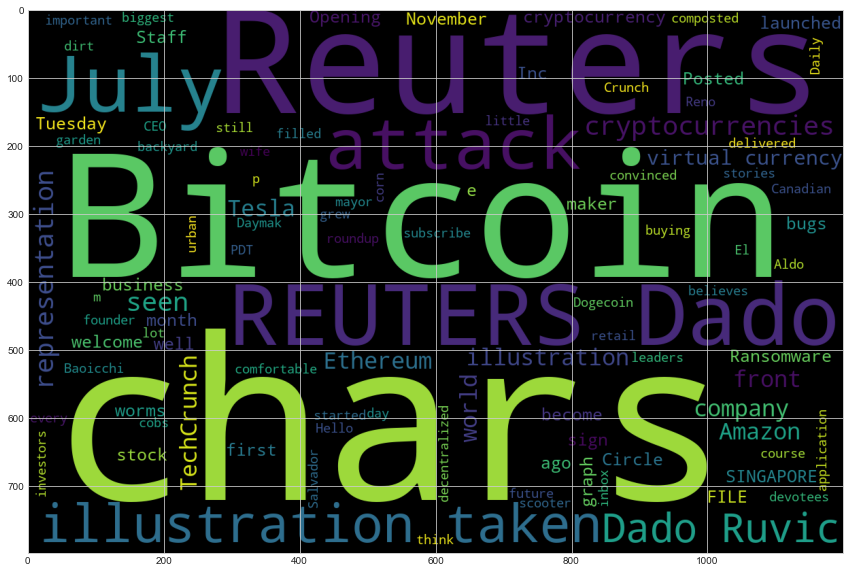

In [40]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
# results_btc= token_count(" ".join(top_10w_btc))
# wc1_btc= WordCloud(width = 1200, height=800, max_words =10).generate(" ".join(top_10w_btc))
wc1_btc= WordCloud(width = 1200, height=800, max_words =100).generate(btc_text)

plt.imshow(wc1_btc)

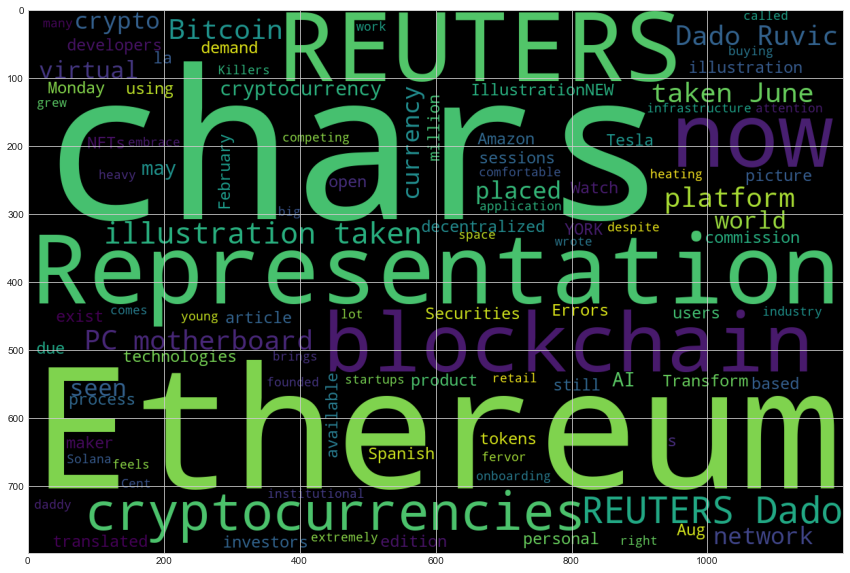

In [39]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wc1_eth= WordCloud(width = 1200, height=800, max_words =100).generate(eth_text)

plt.imshow(wc1_eth)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [41]:
import spacy
from spacy import displacy

In [42]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [43]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [44]:
doc_btc = nlp(btc_text)

In [45]:
doc_btc.user_data["title"] = "Bitcoin Named Entity Recognition (NER)"

In [46]:
 for ent in doc_btc.ents:
        print(ent.text, "-->", ent.label_)

Dogecoin --> GPE
Reno --> PERSON
El Salvador --> GPE
Aldo Baoicchi --> GPE
Canadian --> NORP
Daymak --> ORG
3 p.m. PDT --> TIME
Daily Crunch --> WORK_OF_ART
July 23, 2021 --> DATE
Bitcoin and Ethereum --> ORG
2021 --> DATE
TechCrunch --> ORG
Michael Arrington --> PERSON
Crunchbase --> ORG
CrunchFund --> ORG
Tuesday --> DATE
2017 --> DATE
July 28 --> DATE
Reuters --> ORG
40,000 --> MONEY
Wednesday --> DATE
Martin/CNET
 --> ORG
UK --> GPE
Spain --> GPE
Twitter --> PRODUCT
2020 --> DATE
the US Department of Justi --> ORG
November 19, 2020 --> DATE
Dado Ruvic/IllustrationSINGAPORE --> PERSON
July 21 --> DATE
Reuters --> ORG
Reuters --> ORG
November 19, 2020 --> DATE
10 --> CARDINAL
Things Before the Opening Bell --> WORK_OF_ART
Markets Insider --> PERSON
first --> ORDINAL
Entrepreneur --> ORG
first --> ORDINAL
more than three decades ago --> DATE
six months ago --> DATE
dozens --> CARDINAL
February 9, 2021 --> DATE
Dado RuvicJuly 21 --> PERSON
Reuters --> ORG
Tesla Inc --> PERSON
2020 --> 

In [47]:
displacy.render(doc_btc, style='ent')

---
### Bitcoin NER

In [48]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
btc_text = bitcoin_df.text.str.cat()


In [49]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc_btc = nlp(btc_text)

# Add a title to the document
# YOUR CODE HERE!
doc_btc.user_data["title"] = "Bitcoin Named Entity Recognition (NER)"

In [50]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc_btc, style='ent')

In [51]:
# List all Entities
# YOUR CODE HERE!
for ent in doc_btc.ents:
    print(ent.text, "-->", ent.label_)

Dogecoin --> GPE
Reno --> PERSON
El Salvador --> GPE
Aldo Baoicchi --> GPE
Canadian --> NORP
Daymak --> ORG
3 p.m. PDT --> TIME
Daily Crunch --> WORK_OF_ART
July 23, 2021 --> DATE
Bitcoin and Ethereum --> ORG
2021 --> DATE
TechCrunch --> ORG
Michael Arrington --> PERSON
Crunchbase --> ORG
CrunchFund --> ORG
Tuesday --> DATE
2017 --> DATE
July 28 --> DATE
Reuters --> ORG
40,000 --> MONEY
Wednesday --> DATE
Martin/CNET
 --> ORG
UK --> GPE
Spain --> GPE
Twitter --> PRODUCT
2020 --> DATE
the US Department of Justi --> ORG
November 19, 2020 --> DATE
Dado Ruvic/IllustrationSINGAPORE --> PERSON
July 21 --> DATE
Reuters --> ORG
Reuters --> ORG
November 19, 2020 --> DATE
10 --> CARDINAL
Things Before the Opening Bell --> WORK_OF_ART
Markets Insider --> PERSON
first --> ORDINAL
Entrepreneur --> ORG
first --> ORDINAL
more than three decades ago --> DATE
six months ago --> DATE
dozens --> CARDINAL
February 9, 2021 --> DATE
Dado RuvicJuly 21 --> PERSON
Reuters --> ORG
Tesla Inc --> PERSON
2020 --> 

---

### Ethereum NER

In [52]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
eth_text = ethereum_df.text.str.cat()

In [53]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc_eth = nlp(eth_text)

# Add a title to the document
# YOUR CODE HERE!
doc_eth.user_data["title"] = "Ethereum Named Entity Recognition (NER)"

In [54]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc_eth, style='ent')

In [55]:
# List all Entities
# YOUR CODE HERE!
for ent in doc_eth.ents:
    print(ent.text, "-->", ent.label_)

Ethereum --> ORG
Ethereum Killers --> WORK_OF_ART
Solana --> PERSON
Bitcoin and Ethereum --> ORG
2021 --> DATE
2017 --> DATE
Reddit --> NORP
Ethereum --> ORG
Ethereum --> ORG
February 3, 2018 --> DATE
Dado Ruvic --> PERSON
IllustrationNEW YORK --> GPE
5 --> CARDINAL
Reuters --> ORG
Reuters --> ORG
two-month --> DATE
Thursday --> DATE
Bitcoin and Ethereum --> ORG
June 29, 2021 --> DATE
Dado Ruvic/IllustrationAug 3 --> PERSON
Reuters --> ORG
Monday --> DATE
Amazon --> ORG
Amazon --> ORG
Di Iorio --> PERSON
Ethereum --> ORG
Bloomberg --> PERSON
Slashdot --> ORG
Ethereum --> ORG
June 29, 2021 --> DATE
Dado Ruvic --> PERSON
IllustrationNEW YORK --> GPE
July 30 --> DATE
Reuters --> ORG
second --> ORDINAL
Livepeer --> PRODUCT
$20 million --> MONEY
Ethereum --> ORG
Spanish --> NORP
AI --> ORG
Xoy Capital --> ORG
Guadalajara --> GPE
Jalisco --> GPE
Xoycoin --> PERSON
first --> ORDINAL
Monday --> DATE
Chicago Bulls --> ORG
American Express --> ORG
Spanish --> NORP
AI --> ORG
The Securities and E

---